# Two ferromagnetic islands with magnetizations along the x-direction.

In this report I would like to discuss the paper of Wang et al. about "quantized spin pump on helical edge states of a topological insulator". This work uses the Büttiker-Prêtre-Thomas (BPT) formula for the pumping of charge into a system similar to the one that we are interested in. The system that the authors consider is shown in the figure below.

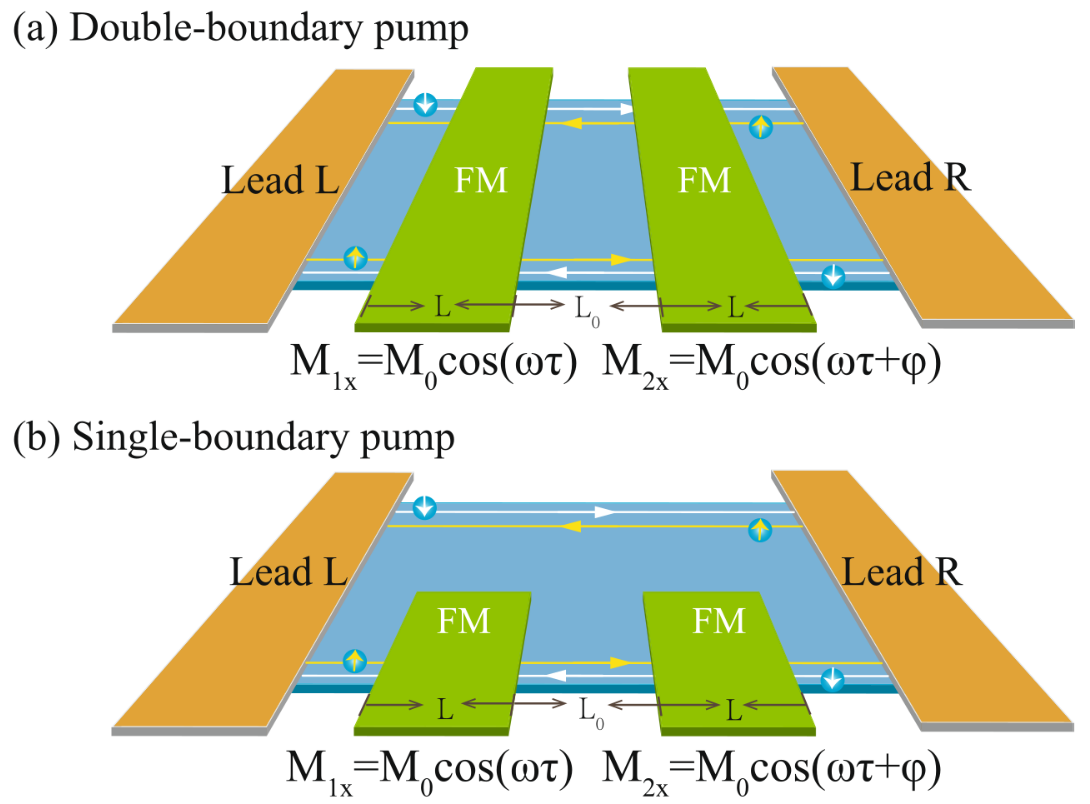

In [4]:
from IPython.display import Image
Image(filename="DeviceWangPaper.png", width=600, height=400)

Fig 1. "Schematic of two pump devices based on the helical states of QSHI. One is the pump potentials of
two FM islands covering double boundaries of QSHI (a) and the second one is the FM deposited only one
boundary of QSHI (b)." From Ref. 1. 

Instead of the Bernevig-Hughes-Zhang (BHZ) hamiltonian for the topological insulator (TI), the authors of Ref. 1 consider the Kane and Mele hamiltonian. This different hamiltonian does not raise any conceptual difference in our interest in the charge that is pumped into the system since both hamiltonians are paradigmatic models of TIs. 

The BPT formula that is employed in the reference to calculate the pump current reads

\begin{equation}
I_{\alpha\sigma} = \frac{ie}{2\pi T}\int^T_0 d\tau 
\mathrm{Tr}\biggl(\frac{\partial S_{\tau}}{\partial \tau} S_{\tau}^*\biggr)_{\alpha\sigma,\alpha\sigma},
\end{equation}

where $S_{\tau}$ is the instantaneous scattering matrix and $\alpha$ the left or right lead index, $\alpha=L$, $R$. The authors do not calculate directly the $S_{\tau}$ matrix in the style of kwant, instead they use the Green function fomalism in the calculation. One expects that the results of the pump current be independent of any of the two formalism. 

The first result of Ref. 1 shows that the current $I_L = I_{L\uparrow} + I_{L\downarrow}$ is quantized (a) for values of $|E| < |M_0|/\sqrt{2}$ , and (b) for $0<\varphi< 2\pi$. Moreover, the quantization is also presented as a function of (c) the separation distance $L_0$ and (d) the gate voltage $V_g/M_0$.

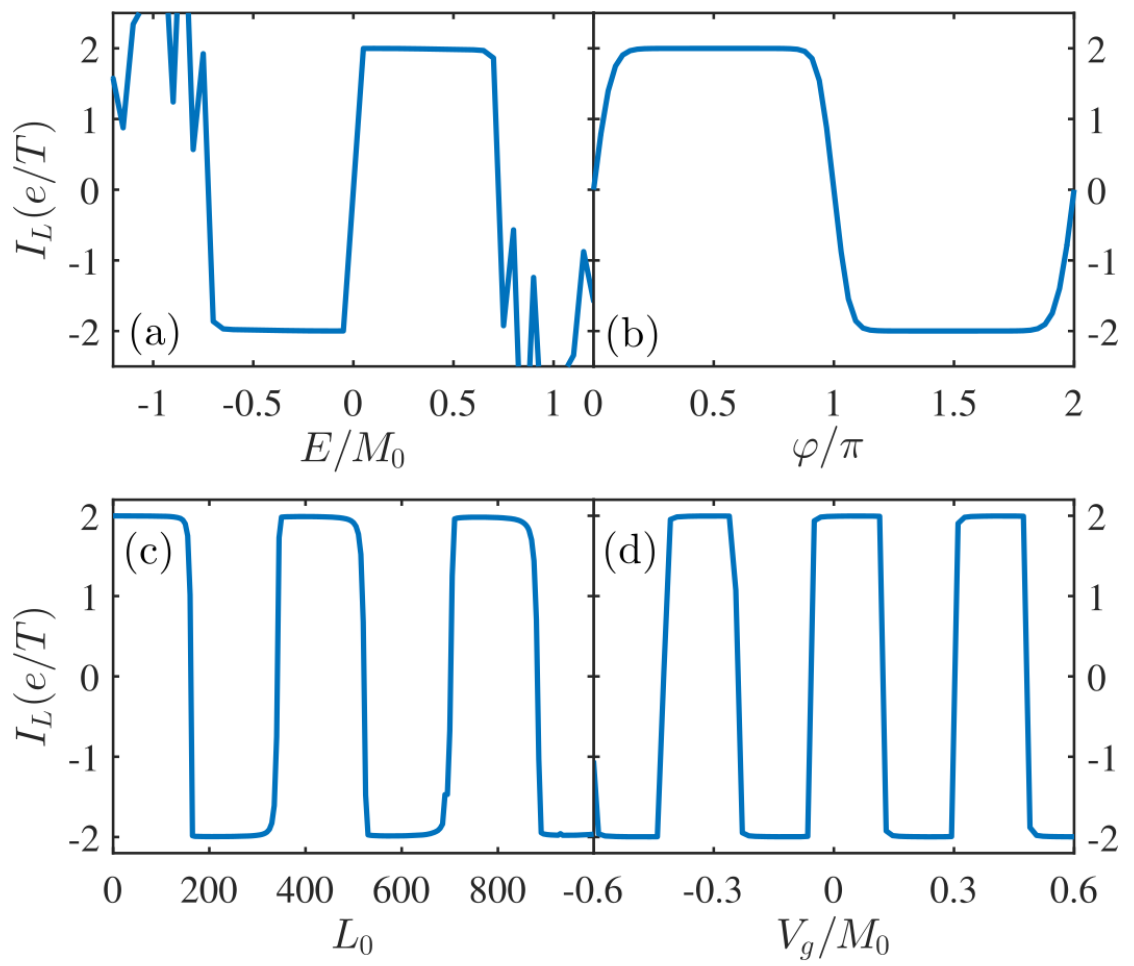

In [5]:
Image(filename="currentsWang.png", width=600, height=400)

Fig. 2. Pumped charge currents $I_L$ in the double-boundary pump device as functions of (a) the Fermi
energy E, (b) the pumping phase $\varphi$, (c) the distance $L_0$ , and (d) the local potential $V_g$. Parameters are $\varphi = \pi/2$, $E = 0.001t$, $L_0 = 0$, $V_g = 0$, and $M_0 = 0.01t$.   

In the lines below I intend to reproduce the results of Fig. 2 using the python package kwant to calculate the instantaneous scattering matrix. The hamiltonian that is considered is the BHZ one and the driven magnetization is the same as in Ref. 1, i.e. $M_{1x} = M_0 \cos{(\omega\tau)}$ and $M_{2x} = M_0 \cos{(\omega\tau + \varphi)}$. In the animated data presented below, scalar and vectorial local densities are presented to have a better insight into the scattering processes. The local quantities are: a) the total density of states $|\psi|$ , b) the z-component of the electronic spin density $<\sigma_z>$, c) the external magnetization $\vec{M}$, and d) the spin texture of the in-plane electronic states $<\vec{\sigma}_{ab}>$. From the total density one can see that charge is transported through the double ferromagnetic islands from the right to the left lead. The transport occurs because the gaps induced by the magnetization of the islands close one after another when time evolves.     




In [1]:
from IPython.display import Video
Video("movielinear.mp4")

Animated data 1. Scalar and vectorial local densities showing the passage of the left and right modes through the scattering region. 
The local quantities are: a) the total density of states  $|\psi|$  , b) the z-component of the electronic spin density  $<\sigma_z>$ , c) the external magnetization  $\vec{M}$  , and d) the spin texture of the in-plane electronic states  $<\vec{\sigma}_{ab}>$.

The calculation of the pump current is carried out numerically as follows,

\begin{equation}
\Delta Q = \frac{i}{2\pi}\int^T_0 \!dt\, \mathrm{Tr}\Bigl\{\frac{dS(E,t)}{dt}S^*(E,t)\Bigr\}=
\frac{i}{2\pi}\lim_{N\rightarrow \infty}\sum_j^N \frac{T}{N}\, \mathrm{Tr}\biggl\{\frac{S(E,t_{j+1})-S(E,t_j)}{t_{j+1}-t_j}S^*(E,t_j)\biggr\},
\end{equation}

where $S(E,t_j)$ is the instantaneous scattering matrix obtained with the python packate kwant. For energies within the magnetically-induced gap, i.e. $|E|<M_0$, the scattering matrix has the 4x4 structure,

\begin{equation}
S(E,t_j) = \left(
\begin{array}{cccc}
r^{11}_{\uparrow\downarrow} & r^{12}_{\uparrow\downarrow} & t^{13}_{\uparrow\uparrow} & t^{14}_{\uparrow\uparrow} \\
r^{21}_{\uparrow\downarrow} & r^{22}_{\uparrow\downarrow} & t^{23}_{\uparrow\uparrow} & t^{24}_{\uparrow\uparrow} \\
t^{31}_{\downarrow\downarrow} & t^{32}_{\downarrow\downarrow} & r^{33}_{\downarrow\uparrow} & r^{34}_{\downarrow\uparrow} \\
t^{41}_{\downarrow\downarrow} & t^{42}_{\downarrow\downarrow} & r^{43}_{\downarrow\uparrow} & r^{44}_{\downarrow\uparrow}
\end{array}
\right),
\end{equation}

where the following sub-blocks can be identified,

\begin{equation}
S(E,t_j) = \left(
\begin{array}{cc}
\hat{r}^{\,l} & \hat{t}^{\,l\rightarrow r} \\
 \hat{t}^{\,r\rightarrow l} & \hat{r}^{\,r} 
\end{array}
\right),
\end{equation}

where $l$ and $r$ stands for the left and right leads. To give an example of the elements of the scattering matrix consideer an incident mode with spin up in mode 1. The probability of reflection in mode 1 (2) with spin down is $r^{11}_{\uparrow\downarrow}$ $(r^{21}_{\uparrow\downarrow})$. On the other hand, the probability of transmission in mode 3 (4) with spin up in the right lead is
$t^{13}_{\uparrow\uparrow}$ $(t^{14}_{\uparrow\uparrow})$. 

The calculation of the pump current, following Eq. (2) with the scattering matrix obtained with kwant gave ZERO (see Fig. 3). I do not understand why.

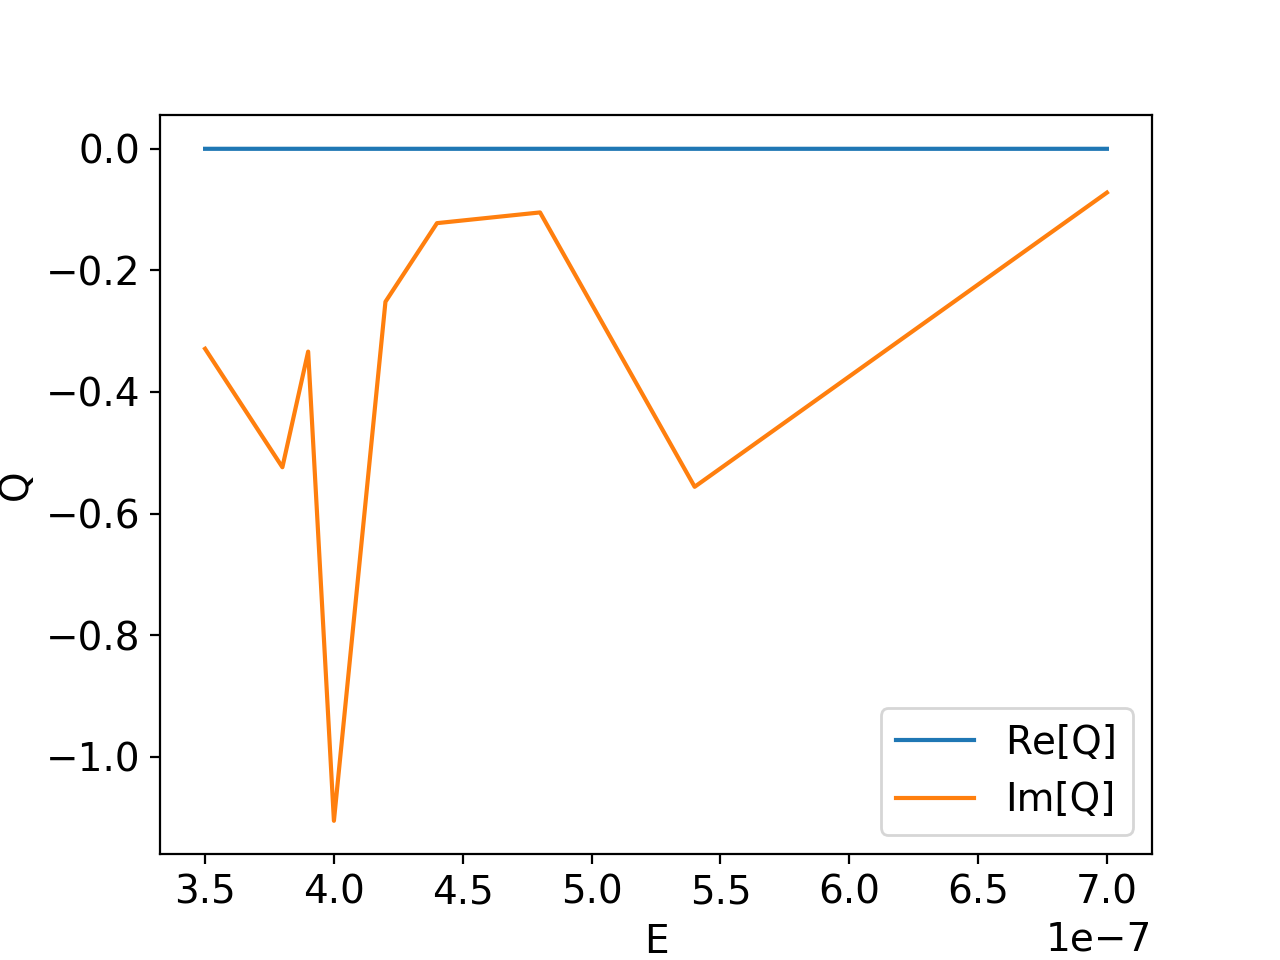

In [7]:
Image(filename="qvsE.png", width=600, height=400)

Fig. 3. Pump charge as a function of the Fermi energy E.   


# Two ferromagnetic islands with magnetizations circulating in the ab plane.

In this section the charge transport through a double ferromagnetic islands like in Fig. 1a is analyzed. However, instead of considering an external magnetization evolving with time along x, we consider a circularly varying $\vec{M}$. The animated data presented below, with the same quantities as the animated data 1, shows rotation of the spin density in the ab plane in both leads.
The sense of rotation is counter-clockwise as is the sense of $\vec{M}$. Moreover, it also shows that the spin density in both leads is all edges is perpendicular to the direction of $\vec{M}$ of the nearest ferromagnetic island. On the other hand, the total density of scattering modes does not show a visible pumping of charge from one lead to another. 

In [6]:
Video("moviecircular.mp4")

Animated data 2. Same quantities as in animated data 1 but for ferromagnetic islands with circulating magnetization. 

# Ballistic junction between a topological insulator and a ferromagnet.

The case that is considered here is a ballistic junction between a TI and a TI in proximity contact with a ferromagnet whose magnetization is rotating counter-clockwisely. The energy dispersion of the left and right leads of this ballistic junction is shown in Fig. 3. 

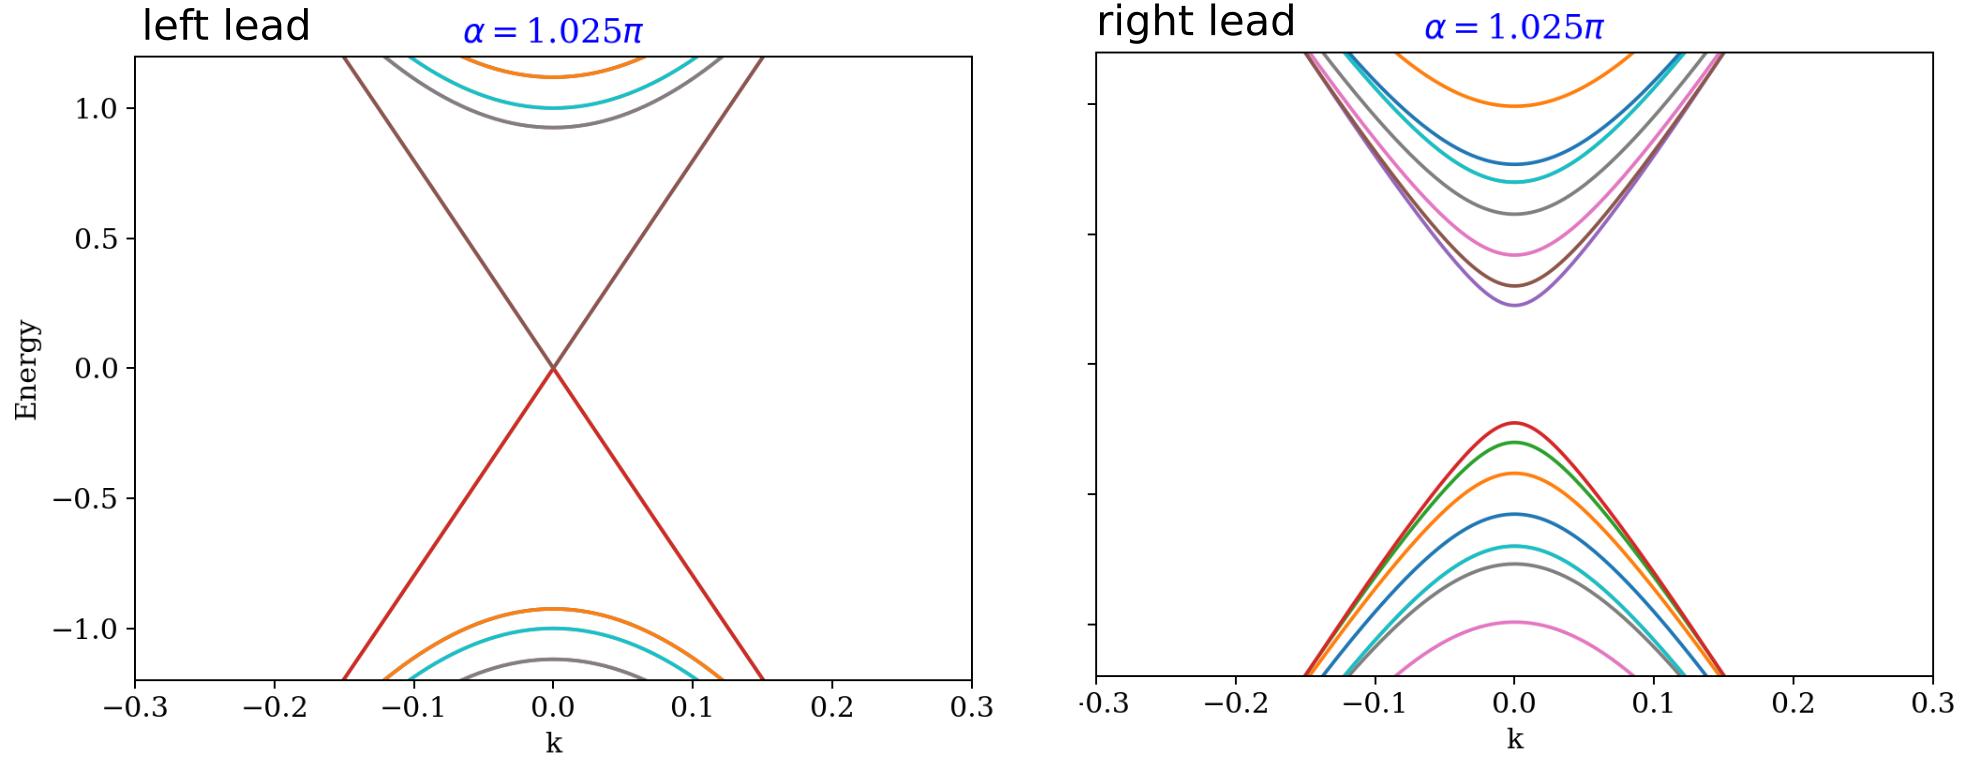

In [6]:
Image(filename="bandsleadsball.png", width=750, height=500)

Fig. 4. Energy disperion of the modes in the left and right leads of a ballistic junction between a TI and a TI in proximity contact with a ferromagnet whose magnetization rotates. 

The local density of scattering states in the animated data below suggest that there is no transport of charge. On the other hand, the texture of the electronic spin density in the ab plane shows counter-clockwise rotation of the scattering modes at the two edges of the left lead. In the right lead due to the gap opened by the magnetization, the electronic density and the spin texture is vanishing.     

In [2]:
Video("TIferroballistic.mp4")

Animated data 3. Same quantities as in animated data 1 but for a ballistic junction between a TI and a TI in proximity contact with a ferromagnet with circulating magnetization. 

## The ballistic junction in the low-energy limit

In the lines below the reflection coefficient at the TI/FI interface is calculated by approximating the BHZ hamiltonian in the low-energy limit, i.e. considering only the massless modes that propagate at the edges,  

\begin{equation}
\mathscr{H} = \left( 
\begin{array}{cc} 
-iv_{F}\partial_x + m_z\theta(x) & m_{||}\theta(x)e^{-i\alpha}\\ 
m_{||}\theta(x)e^{i\alpha} & +iv_{F}\partial_x -m_z\theta(x) 
\end{array}
\right),
\end{equation}

where $\theta(x)$ is the step function and $\alpha$ the time-dependent angle in the plane of the junction.

Solving the hamiltonian by parts, i.e. the TI and FI region, one obtains the following general solutions,

\begin{eqnarray}
\psi_{FI}(x) &=& a \left ( 
\begin{array}{c} 
1 \\
e^{i\theta_m}e^{i\alpha} 
\end{array}\right)
e^{-i\frac{m_z}{v_F}x}e^{\frac{\sqrt{m_{||}^2-E^2}}{v_F}x} +
b \left ( 
\begin{array}{c} 
e^{i\theta_m}e^{-i\alpha} \\ 
1 
\end{array}\right)
e^{-i\frac{m_z}{v_F}x}e^{-\frac{\sqrt{m_{||}^2-E^2}}{v_F}x},
\quad x>0,
\end{eqnarray}

and

\begin{equation}
\psi_{TI}(x) =  c \left ( 
\begin{array}{c} 
1 \\ 0 
\end{array}\right)e^{i\frac{E}{v_F}x} +
 d \left ( 
\begin{array}{c} 
0 \\ 1  
\end{array}\right)e^{-i\frac{E}{v_F}x},
\quad x<0,
\end{equation}

where $\cos{\theta_m}=\frac{E}{m_{||}}$. Discarding the exponentially increasing wave function in the FI region and imposing continuity of the function at the interface one obtains the reflection and transmission coefficients, 

\begin{equation}
r(E)=\frac{c}{d}=e^{i\theta_m}e^{-i\alpha}, \quad T(E) = \frac{b}{d} = 1.
\end{equation}

The Büttiker-Prêtre-Thomas (BPT) formula for the pumping of charge reads,

\begin{equation}
\Delta Q = -\frac{1}{2\pi}\int^T_0 dt \int_{-\infty}^{\infty} dE\rho'(E)\,\Xi_{jj}(E,t),
\end{equation}

where $\rho'(E)$ is the derivative of the Fermi-Dirac function with respect to energy and $\,\Xi(E,t)=i\mathrm{Tr}\bigl\{\frac{dS(E,t)}{dt}S^*(E,t)\bigr\}$, with $S(E,t)$ being the scattering matrix. Considering the case of zero temperature, the BPT formula turns,

\begin{equation}
\Delta Q = \frac{i}{2\pi}\int^T_0 dt \mathrm{Tr}\Bigl\{\Bigl(\frac{dS}{dt}S^* \Bigr)\Bigl|_{E_F}\Bigr\}
\end{equation}

Substitution of the reflection and transmission coefficients obtained above yields,

\begin{equation}
\Delta Q = \frac{1}{2\pi}\int^T_0 dt \frac{d\alpha}{dt}|r(E_F)|^2
\end{equation}

# Bibliography

[1] "Quantized spin pump on helical edge states of a topological insulator", Mei-Juan Wang, Jun Wang, and Jun-Feng Liu, Scientific Reports 9, 3378 (2019).